In [2]:
# Libraries: Standard ones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Library for boxplots
import seaborn as sns

# K-means function
from sklearn.cluster import KMeans

# Functions for silhouette
from sklearn.metrics import silhouette_samples, silhouette_score

# Function to standardize the data 
from sklearn.preprocessing import scale

# Functions for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [3]:
#Data Presentation

In [4]:
# Load the data: temp
temp = pd.read_csv("temperat.csv",sep=";")
temp=temp.rename(columns={'Unnamed: 0': 'Ville'})

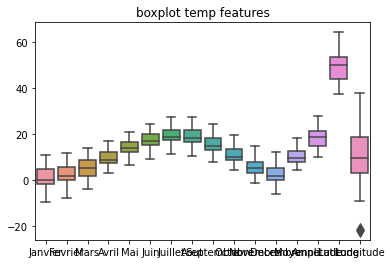

In [5]:
# Boxplot for temp
plt.figure()
plt.title('boxplot temp features')
temp_box=sns.boxplot(data=temp,fliersize=10)   # fliersize is the size used to indicate the outliers
plt.show()

In [6]:
 #With this representation, we do not visually extract some clusters. We however remark that,  shows a lot of outliers.

In [7]:
temp.describe()

,Janvier,Fevrier,Mars,Avril,Mai,Juin,Juillet,Aout,Septembre,Octobre,Novembre,Decembre,Moyenne,Amplitude,Latitude,Longitude
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,1.345714,2.217143,5.228571,9.282857,13.911429,17.414286,19.622857,18.980000,15.631429,11.002857,6.065714,2.880000,10.265714,18.317143,48.980000,10.590286
std,5.502157,5.498956,4.863040,3.806456,3.273582,3.320271,3.574673,3.727939,4.109728,4.323226,4.566820,4.967411,3.963061,4.505649,7.199869,12.362187
min,-9.300000,-7.900000,-3.700000,2.900000,6.500000,9.300000,11.100000,10.600000,7.900000,4.500000,-1.100000,-6.000000,4.500000,10.200000,37.400000,-21.600000
25%,-1.550000,-0.150000,1.600000,7.250000,12.150000,15.400000,17.300000,16.650000,13.000000,8.650000,3.200000,0.250000,7.750000,14.900000,43.900000,3.200000
50%,0.200000,1.900000,5.400000,8.900000,13.800000,16.900000,18.900000,18.300000,14.800000,10.200000,5.100000,1.700000,9.700000,18.500000,50.000000,9.400000
75%,4.900000,5.800000,8.500000,12.050000,16.350000,19.800000,21.750000,21.600000,18.250000,13.300000,7.900000,5.400000,12.650000,21.450000,53.350000,18.650000
max,10.700000,11.800000,14.100000,16.900000,20.900000,24.500000,27.400000,27.200000,24.300000,19.400000,14.900000,12.000000,18.200000,27.600000,64.100000,37.600000


In [8]:
#We're gonna try to find clusters with lat/long and average temperature

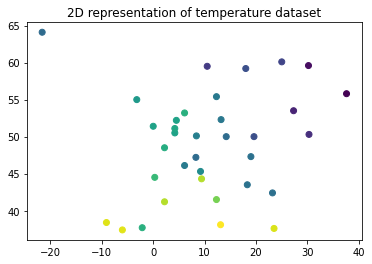

In [9]:
# Representation of the temperature dataset
plt.title('2D representation of temperature dataset')
plt.scatter(temp['Longitude'],temp['Latitude'], c=temp['Decembre'])

In [10]:
#We can say that the temperature in December is highly correlated with latitude and longitude

In [11]:
#Here we just display the average temperature for each city

import folium
from folium.plugins import FastMarkerCluster
from folium.vector_layers import CircleMarker
import branca.colormap as cm

#We select the file we're going to use and the filed we display
file=temp
champ_etudie='Moyenne'

linear=cm.linear.RdYlBu_06.scale(0, 1)


m = folium.Map(tiles='cartodbpositron', zoom_start=3 ,location=[48.499998 ,23.3833318])

for index,row in file.iterrows():
#     keyon_cluster = folium.Marker(location=[row['Latitude'],row['Longitude']],popup=row['Ville']).add_to(m)
    folium.CircleMarker(location=[row['Latitude'],row['Longitude']], 
                        radius=5,
                        popup=str(row['Ville'])+': '+str(row[champ_etudie]), 
                        line_color=None,
                        fill_color=linear(1-(row[champ_etudie]-file[champ_etudie].min())/(file[champ_etudie].max()-file[champ_etudie].min())),
                        fill_opacity=1,
                        color=linear(1-(row[champ_etudie]-file[champ_etudie].min())/(file[champ_etudie].max()-file[champ_etudie].min()))).add_to(m)

In [12]:
m

In [13]:
# We apply K-means algorithm and calculate Silhouette index for a given number of clusters
# (Remark: it is a little difficult to visualize, since it is dimension 5)

temp_we_drop=temp[['Ville','Region','Latitude','Longitude']]

new_temp = temp.drop(['Ville','Region','Latitude','Longitude'], axis=1)

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
for n in range_n_clusters:
    kmeans_temp = KMeans(n_clusters=n, n_init=10).fit(new_temp) # Clustering with the given number of clusters
    cluster_labels = kmeans_temp.labels_ # Extract the labels
    silhouette_avg = silhouette_score(new_temp, cluster_labels) # Corresponding silhouette score
   
    # Display the results
    print("For n =", n, "Silhouette_score:", silhouette_avg)

For n = 2 Silhouette_score: 0.5187111529098996
For n = 3 Silhouette_score: 0.4831014618030819
For n = 4 Silhouette_score: 0.45419340361377014
For n = 5 Silhouette_score: 0.4718324275058679
For n = 6 Silhouette_score: 0.4532401102390238
For n = 7 Silhouette_score: 0.41808873763557797
For n = 8 Silhouette_score: 0.43160424885676413
For n = 9 Silhouette_score: 0.3810613433818221
For n = 10 Silhouette_score: 0.37274840136048004


In [14]:
#We think K=5 would be the best

kmeans = KMeans(n_clusters=5,n_init=10,init='random').fit(new_temp)

new_temp_with_labels=pd.concat([temp,pd.DataFrame(data=kmeans.labels_,columns=['label'])], axis=1, sort=False)

In [15]:
#We are going to diplay the results of kmeans for k=5


import folium
from folium.plugins import FastMarkerCluster
from folium.vector_layers import CircleMarker
import branca.colormap as cm

#We select the file we're going to use
file=new_temp_with_labels
champ_etudie='label'

linear=cm.linear.RdYlBu_06.scale(0, 1)


m = folium.Map(tiles='cartodbpositron', zoom_start=3 ,location=[48.499998 ,23.3833318])

for index,row in file.iterrows():
#     keyon_cluster = folium.Marker(location=[row['Latitude'],row['Longitude']],popup=row['Ville']).add_to(m)
    folium.CircleMarker(location=[row['Latitude'],row['Longitude']], 
                        radius=5,
                        popup=str(row['Ville'])+': '+str(row[champ_etudie]), 
                        line_color=None,
                        fill_color=linear(1-(row[champ_etudie]-file[champ_etudie].min())/(file[champ_etudie].max()-file[champ_etudie].min())),
                        fill_opacity=1,
                        color=linear(1-(row[champ_etudie]-file[champ_etudie].min())/(file[champ_etudie].max()-file[champ_etudie].min()))).add_to(m)
    
m

In [32]:
temp_amplitude=temp[['Ville','Amplitude']]

temp_ampl_no_city=temp['Amplitude'].reset_index()

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
for n in range_n_clusters:
    kmeans_ampl = KMeans(n_clusters=n, n_init=10).fit(temp_ampl_no_city) # Clustering with the given number of clusters
    cluster_labels = kmeans_ampl.labels_ # Extract the labels
    silhouette_avg = silhouette_score(temp_ampl_no_city, cluster_labels) # Corresponding silhouette score
   
    # Display the results
    print("For n =", n, "Silhouette_score:", silhouette_avg)
    

For n = 2 Silhouette_score: 0.4922901228111209
For n = 3 Silhouette_score: 0.39136104746877826
For n = 4 Silhouette_score: 0.3920037288422096
For n = 5 Silhouette_score: 0.3819483498629316
For n = 6 Silhouette_score: 0.3829063797736344
For n = 7 Silhouette_score: 0.39475601182818265
For n = 8 Silhouette_score: 0.3982517469844753
For n = 9 Silhouette_score: 0.4105410906341304
For n = 10 Silhouette_score: 0.39908109814526327


In [17]:
y=temp_amplitude.sort_values(by='Amplitude')

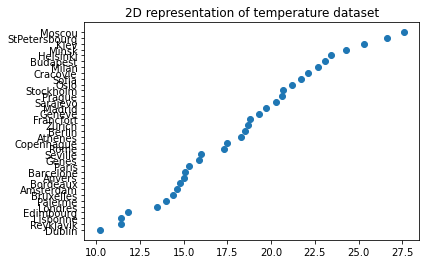

In [18]:
plt.title('2D representation of temperature dataset')
plt.scatter(y['Amplitude'],y['Ville'])

#ca sert a rien

In [19]:
#Now we're going to separate each one of the groups we found and see if we can find the seasons

In [20]:
group1=new_temp_with_labels[new_temp_with_labels['label']==0]
group2=new_temp_with_labels[new_temp_with_labels['label']==1]
group3=new_temp_with_labels[new_temp_with_labels['label']==2]
group4=new_temp_with_labels[new_temp_with_labels['label']==3]
group5=new_temp_with_labels[new_temp_with_labels['label']==4]

In [21]:
group2

,Ville,Janvier,Fevrier,Mars,Avril,Mai,Juin,Juillet,Aout,Septembre,Octobre,Novembre,Decembre,Moyenne,Amplitude,Latitude,Longitude,Region,label
0,Amsterdam,2.9,2.5,5.7,8.2,12.5,14.8,17.1,17.1,14.5,11.4,7.0,4.4,9.9,14.6,52.2,4.5,Ouest,1
3,Bruxelles,3.3,3.3,6.7,8.9,12.8,15.6,17.8,17.8,15.0,11.1,6.7,4.4,10.3,14.4,50.5,4.2,Ouest,1
6,Dublin,4.8,5.0,5.9,7.8,10.4,13.3,15.0,14.6,12.7,9.7,6.7,5.4,9.3,10.2,53.2,6.1,Nord,1
11,Londres,3.4,4.2,5.5,8.3,11.9,15.1,16.9,16.5,14.0,10.2,6.3,4.4,9.7,13.5,51.4,0.0,Nord,1
16,Paris,3.7,3.7,7.3,9.7,13.7,16.5,19.0,18.7,16.1,12.5,7.3,5.2,11.2,15.3,48.5,2.2,Ouest,1
18,Reykjavik,-0.3,0.1,0.8,2.9,6.5,9.3,11.1,10.6,7.9,4.5,1.7,0.2,4.6,11.4,64.1,-21.6,Nord,1
23,Anvers,3.1,2.9,6.2,8.9,12.9,15.5,17.9,17.6,14.7,11.5,6.8,4.7,10.3,15.0,51.1,4.2,Ouest,1
26,Edimbourg,2.9,3.6,4.7,7.1,9.9,13.0,14.7,14.3,12.1,8.7,5.3,3.7,8.3,11.8,55.0,-3.2,Nord,1


In [22]:
#now we do k-means but to get the seasons

group2_month=group2.drop(['Ville','Moyenne','Amplitude','Latitude','Longitude','Region','label'],axis=1)

#We first need to transpose our dataset
group2_month_rev=group2_month.T
group2_month_rev_clean=group2_month_rev.reset_index().drop(['index'],axis=1)

#and now we perform k-means on the reverted dataframe

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
for n in range_n_clusters:
    kmeans_seasons = KMeans(n_clusters=n, n_init=10).fit(group2_month_rev_clean) # Clustering with the given number of clusters
    cluster_labels = kmeans_seasons.labels_ # Extract the labels
    silhouette_avg = silhouette_score(group2_month_rev_clean, cluster_labels) # Corresponding silhouette score
   
    # Display the results
    print("For n =", n, "Silhouette_score:", silhouette_avg)

For n = 2 Silhouette_score: 0.6529019772492473
For n = 3 Silhouette_score: 0.5726508545714291
For n = 4 Silhouette_score: 0.5460800911693663
For n = 5 Silhouette_score: 0.59527736682751
For n = 6 Silhouette_score: 0.5631175190654822
For n = 7 Silhouette_score: 0.48931786164899
For n = 8 Silhouette_score: 0.4313131339594796
For n = 9 Silhouette_score: 0.3294156310425222
For n = 10 Silhouette_score: 0.24076550642776406


In [23]:
#We choose k=2 or k=5

#k=5
kmeans_seasons = KMeans(n_clusters=5,n_init=10,init='random').fit(group2_month_rev_clean)
kmeans_seasons.labels_

array([0, 0, 3, 3, 4, 2, 1, 1, 2, 4, 3, 0])

In [24]:
#We choose k=2 or k=5

#k=2
kmeans_seasons = KMeans(n_clusters=2,n_init=10,init='random').fit(group2_month_rev_clean)
kmeans_seasons.labels_

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0])

In [25]:
group5

,Ville,Janvier,Fevrier,Mars,Avril,Mai,Juin,Juillet,Aout,Septembre,Octobre,Novembre,Decembre,Moyenne,Amplitude,Latitude,Longitude,Region,label
12,Madrid,5.0,6.6,9.4,12.2,16.0,20.8,24.7,24.3,19.8,13.9,8.7,5.4,13.9,19.7,37.7,-2.14,Sud,4
25,Bordeaux,5.6,6.7,9.0,11.9,15.0,18.3,20.4,20.0,17.6,13.5,8.5,6.1,12.7,14.8,44.5,0.30,Ouest,4
30,Milan,1.1,3.6,8.0,12.6,17.3,21.3,23.8,22.8,18.9,13.1,6.9,2.6,12.6,22.7,45.3,9.20,Sud,4


In [26]:
#now we do k-means but to get the seasons

group5_month=group5.drop(['Ville','Moyenne','Amplitude','Latitude','Longitude','Region','label'],axis=1)

#We first need to transpose our dataset
group5_month_rev=group5_month.T
group5_month_rev=group5_month_rev.reset_index().drop(['index'],axis=1)

#and now we perform k-means on the reverted dataframe

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
for n in range_n_clusters:
    kmeans_seasons = KMeans(n_clusters=n, n_init=10).fit(group5_month_rev) # Clustering with the given number of clusters
    cluster_labels = kmeans_seasons.labels_ # Extract the labels
    silhouette_avg = silhouette_score(group5_month_rev, cluster_labels) # Corresponding silhouette score
   
    # Display the results
    print("For n =", n, "Silhouette_score:", silhouette_avg)

For n = 2 Silhouette_score: 0.6084425484367902
For n = 3 Silhouette_score: 0.5959164725307108
For n = 4 Silhouette_score: 0.6019301291867677
For n = 5 Silhouette_score: 0.547528855742573
For n = 6 Silhouette_score: 0.5975790333594223
For n = 7 Silhouette_score: 0.4642416467920592
For n = 8 Silhouette_score: 0.3836324456202392
For n = 9 Silhouette_score: 0.2866158204842164
For n = 10 Silhouette_score: 0.24410884825691367


In [27]:
#now we do k-means but to get the seasons

group4_month=group4.drop(['Ville','Moyenne','Amplitude','Latitude','Longitude','Region','label'],axis=1)

#We first need to transpose our dataset
group4_month_rev=group4_month.T
group4_month_rev=group4_month_rev.reset_index().drop(['index'],axis=1)

#and now we perform k-means on the reverted dataframe

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
for n in range_n_clusters:
    kmeans_seasons = KMeans(n_clusters=n, n_init=10).fit(group4_month_rev) # Clustering with the given number of clusters
    cluster_labels = kmeans_seasons.labels_ # Extract the labels
    silhouette_avg = silhouette_score(group4_month_rev, cluster_labels) # Corresponding silhouette score
    # Display the results
    print("For n =", n, "Silhouette_score:", silhouette_avg)

For n = 2 Silhouette_score: 0.6473007162714955
For n = 3 Silhouette_score: 0.567397852222946
For n = 4 Silhouette_score: 0.5830790925942381
For n = 5 Silhouette_score: 0.6049305610688173
For n = 6 Silhouette_score: 0.5166813323242978
For n = 7 Silhouette_score: 0.47138272163318456
For n = 8 Silhouette_score: 0.37588485575049974
For n = 9 Silhouette_score: 0.26592165395026096
For n = 10 Silhouette_score: 0.15558593118566003


In [28]:
cluster_labels

array([8, 1, 6, 5, 7, 0, 4, 4, 9, 2, 3, 1])

In [29]:
#Now we are going to perform hierarchical clustering

# We standardize the columns of interest
new_temp_scaled=pd.DataFrame(scale(new_temp),columns=new_temp.columns,index=new_temp.index)  # scale(food) returns a numpy array, so use pd.Dataframe to reconstruct your dataframe


# We apply hierarchical clustering with dissimilarity measure "ward"
Z = linkage(new_temp_scaled, 'ward') # 'average' is the method used to compute the distance. Metric is "euclidian" by default

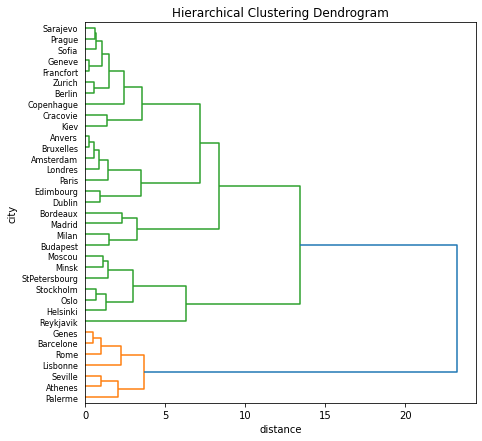

In [31]:
# We represent the corresponding Dendrogram

#Since we want to display the Dendrogram with cities and not just index, we create the label_city list

label_city=[]
for index,row in temp.iterrows():
    label_city.append(row['Ville'])
    
#And now we can plot
plt.figure(figsize=(7, 7))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('city')
plt.xlabel('distance')
dendrogram(
    Z,
    orientation='right',
    labels=label_city
)
plt.show()